In [ ]:

from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
for iteration in range(10000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
print (1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))


[0.99993704]


The Human brain consists of 100 billion cells called neurons, connected by synapses. If sufficient synaptic inputs to a neuron fire, that neuron will also fire. We call this thinking...

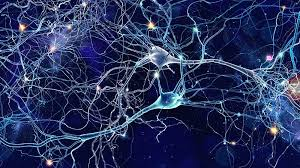

##Neural Networks attempy to mimic this process using matrices.

We are going to make a simple model of a single neuron, with three inputs and one out put.

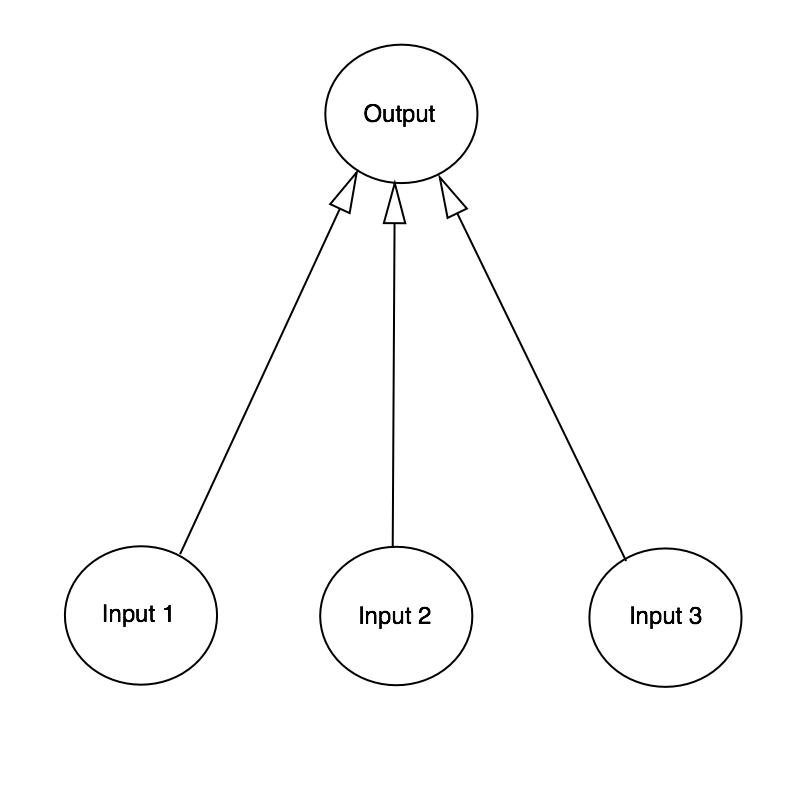

We are going to train this neuron to solve a simple pattern logic puzzle:

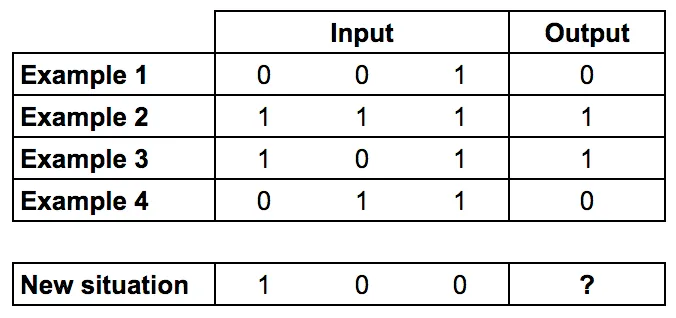

What should the solution be?
1, it is always mimicking the left most input.

To teach our neuron how to approach the problem we first set the weights of our inputs to random values.



1.   Take the inputs from the tarining data set, adjust them by the weights, pass them through a formula to calculate the neurons output.
2.   Calculate the error, which is the difference between the neuron’s output and the desired output in the training set example.
3. Depending on the direction of the error, adjust the weights slightly.
4. Repeat this process 10, 000 times.



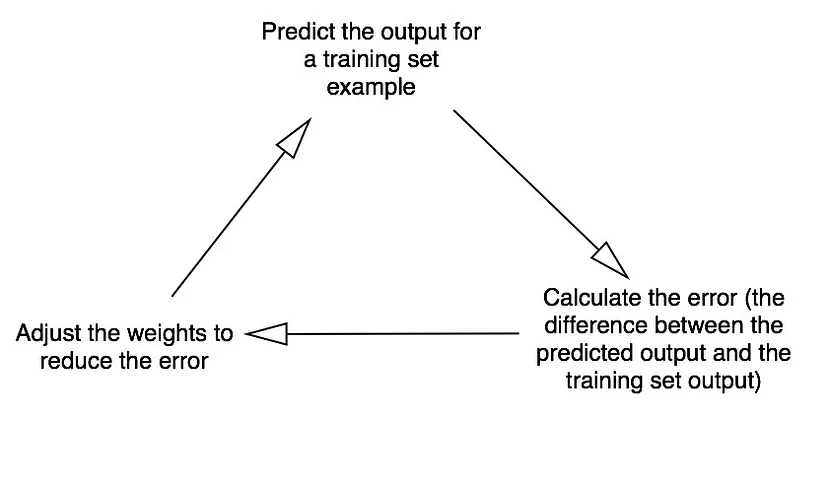

Eventually the weights of the neuron will reach an optimum for the training set. If we allow the neuron to think about a new situation, that follows the same pattern, it should make a good prediction.

##Formula for calculating the neurons output

1_RV7-CFkmmByfcXKkPcbAYQ.png

##Next we have to normailse
We are going to use the sigmoid function

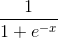

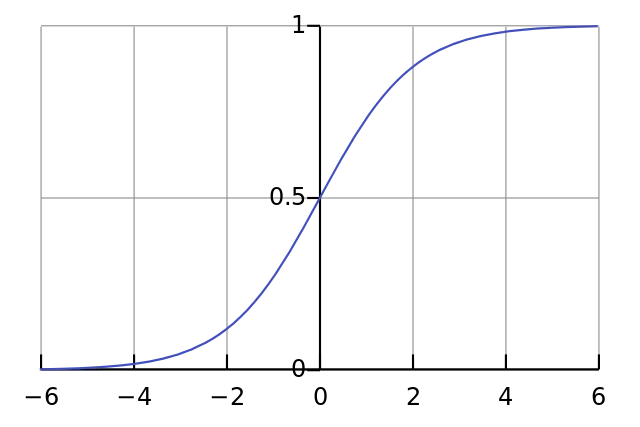

We have to combine these to calculate the output of our neuron

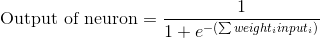

##During training we have to adjust the weights as out connections are tested.
We can use the Error Weighted Derivative formula:

adjust.png

This approach allows us to adjust the weighting based on the magnitude of the error.

Next we multiply the by the input, in our case this is either 0 or 1.

Lastly, we multiply by the gradient of the sigmoid curve.

1. We used the Sigmoid curve to calculate the output of the neuron.
2. If the output is a large positive or negative number, it signifies the neuron was quite confident one way or another.
3. From Diagram 4, we can see that at large numbers, the Sigmoid curve has a shallow gradient.
4. If the neuron is confident that the existing weight is correct, it doesn’t want to adjust it very much. Multiplying by the Sigmoid curve gradient achieves this.

The gradient of the Sigmoid curve, can be found by taking the derivative:



sigcurve.png

So by substituting the second equation into the first equation, the final formula for adjusting the weights is:

adjustment.png

There are alternative formulae, which would allow the neuron to learn more quickly, but this one has the advantage of being fairly simple.


##Constructing our code

First lets set up our data set:

In [ ]:
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

The ‘.T’ function, transposes the matrix from horizontal to vertical. So the computer is storing the numbers like this.

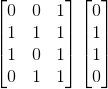

In [ ]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.


        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):

            # Pass the training set through our neural network (a single neuron).

            # Calculate the error (The difference between the desired output
            # and the predicted output).

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.

            # Adjust the weights.

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).


if __name__ == "__main__":

    #Intialise a single neuron neural network.

    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.


    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.

    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")
    print (neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]
